# <b> Données temporelles

In [3]:
import sys 
sys.path.insert(1, "../utils")

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import utils
from utils import *

# <i> dataset 2

<h2> General informations

In [5]:
data2 = pd.read_csv("../Data/Dataset2.csv")
data2

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,10/11/2020,10/31/2020,22.0,2543.0,23.0,2.6,304.7,0.9
1,95129,43,39741,5/30/2021,6/19/2021,NaN,3315.0,14.0,1.1,397.2,0.4
2,95129,40,39741,3/28/2021,4/17/2021,34.0,4816.0,37.0,4.1,577.1,0.8
3,95129,55,39741,2/6/2022,2/26/2022,110.0,10194.0,175.0,13.2,1221.5,1.7
4,95129,44,39741,6/20/2021,7/10/2021,14.0,3033.0,17.0,1.7,363.4,0.6
...,...,...,...,...,...,...,...,...,...,...,...
332,94085,59,23223,1-May,21-May,165.0,2315.0,192.0,33.8,474.7,8.3
333,94085,63,23223,24-Jul,13-Aug,150.0,1348.0,190.0,30.8,276.4,14.1
334,94085,61,23223,12-Jun,2-Jul,219.0,1696.0,255.0,44.9,347.8,15.0
335,94085,27,23223,28-Jun,18-Jul,53.0,1379.0,61.0,10.9,282.8,4.4


In [6]:
print_info(data2)

{'Number of rows': 337,
 'Number of colonns': 11,
 'Memory size': '28.9609375 ko',
 'Data type': ['int64', 'object', 'float64']}

In [7]:
colonnes_description = describe_column(data2)
pd.DataFrame(colonnes_description, columns = ["Name","Non-null value","Type"])

,Name,Non-null value,Type
0,zcta,337,int64
1,time_period,337,int64
2,population,337,int64
3,Start date,337,object
4,end date,337,object
5,case count,311,float64
6,test count,325,float64
7,positive tests,310,float64
8,case rate,337,float64
9,test rate,337,float64


In [8]:
from importlib import reload
reload(utils)
print("Missing values informations \n")
utils.missing_values_info(data2)


Missing values informations 



,Column,Missing_Values_Count,Missing_Values_Percentage
0,zcta,0,0.000000
1,time_period,0,0.000000
2,population,0,0.000000
3,Start date,0,0.000000
4,end date,0,0.000000
5,case count,26,7.715134
6,test count,12,3.560831
7,positive tests,27,8.011869
8,case rate,0,0.000000
9,test rate,0,0.000000


In [9]:
from utils import central_trend,symetrie, quartile, missing_value
attributes = data2.select_dtypes(include='number').columns
central_trend_dict = {}

for attribute in attributes:
    ct_result = central_trend(data2, attribute)
    tc = {
        'Median': ct_result['median'],
        'Mean': ct_result['mean'],
        'Modes': ct_result['modes'],
    }
    tc['symetrie'] = symetrie(tc)
    central_trend_dict[attribute] = tc

pd.DataFrame.from_dict(central_trend_dict, orient='index')

,Median,Mean,Modes,symetrie
zcta,95035.0,94663.596439,"[94085, 94086]",Distribution non identifie
time_period,43.0,43.694362,"[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 3...",Distribution non identifie
population,50477.0,50260.548961,"[23223, 50477]",Distribution non identifie
case count,91.0,225.987138,[0.0],Distribution d'asymetrie positive
test count,4352.0,4938.116923,"[1295.0, 2251.0, 2497.0, 2747.0, 6659.0]",Distribution non identifie
positive tests,108.5,380.196774,"[20.0, 47.0, 63.0]",Distribution d'asymetrie positive
case rate,8.1,19.390504,[0.0],Distribution d'asymetrie positive
test rate,427.1,454.838872,[0.1],Distribution d'asymetrie positive
positivity rate,3.0,5.827596,[1.1],Distribution d'asymetrie positive


<h2> Preprocessing

In [10]:
new_data= data2.dropna(axis=0)
new_data

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,10/11/2020,10/31/2020,22.0,2543.0,23.0,2.6,304.7,0.9
2,95129,40,39741,3/28/2021,4/17/2021,34.0,4816.0,37.0,4.1,577.1,0.8
3,95129,55,39741,2/6/2022,2/26/2022,110.0,10194.0,175.0,13.2,1221.5,1.7
4,95129,44,39741,6/20/2021,7/10/2021,14.0,3033.0,17.0,1.7,363.4,0.6
5,95129,54,39741,1/16/2022,2/5/2022,624.0,13479.0,817.0,74.8,1615.1,6.1
...,...,...,...,...,...,...,...,...,...,...,...
332,94085,59,23223,1-May,21-May,165.0,2315.0,192.0,33.8,474.7,8.3
333,94085,63,23223,24-Jul,13-Aug,150.0,1348.0,190.0,30.8,276.4,14.1
334,94085,61,23223,12-Jun,2-Jul,219.0,1696.0,255.0,44.9,347.8,15.0
335,94085,27,23223,28-Jun,18-Jul,53.0,1379.0,61.0,10.9,282.8,4.4


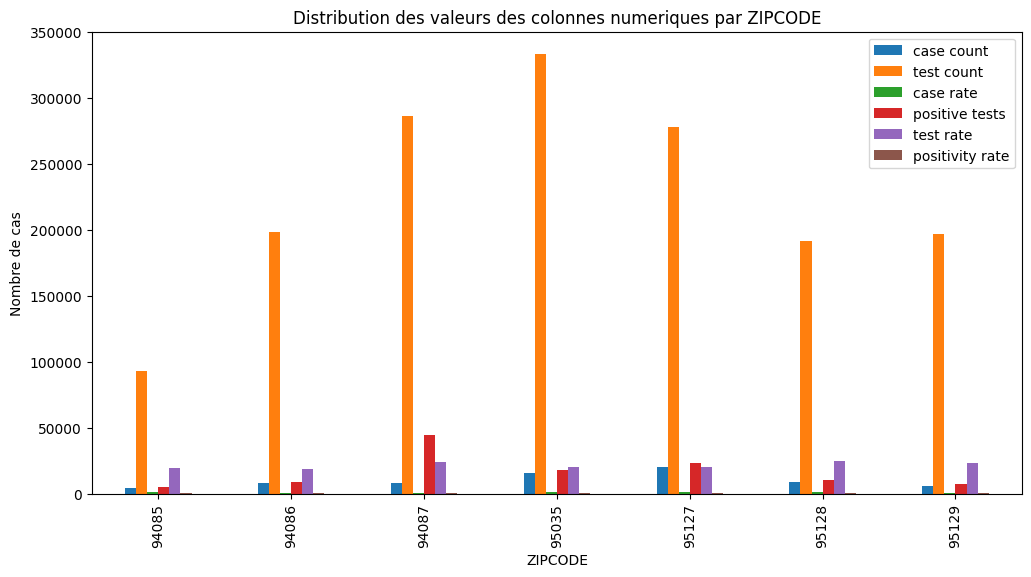

In [11]:
data_grouped = new_data.groupby('zcta')[['case count','test count','case rate', 'positive tests','test rate','positivity rate']].sum()
data_grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Distribution des valeurs des colonnes numeriques par ZIPCODE')
plt.xlabel('ZIPCODE')
plt.ylabel('Nombre de cas')
plt.legend(['case count','test count','case rate', 'positive tests','test rate','positivity rate'])
plt.show()

On remarque qu'il y a une disproportion entre les valeurs des attributs selon les zones c'est pour cette raison qu'on choisi de traiter les outliers par zone

Visualisation avant pretraitement des outliers

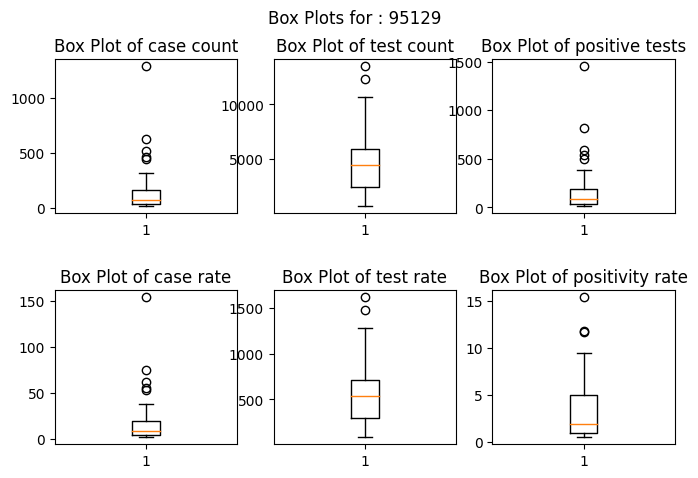

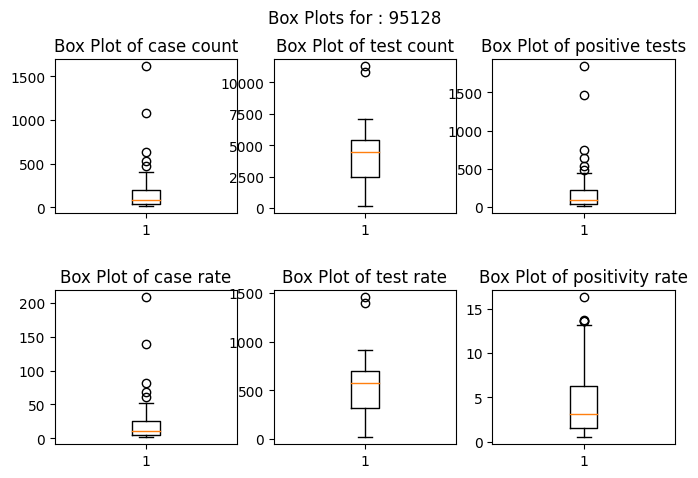

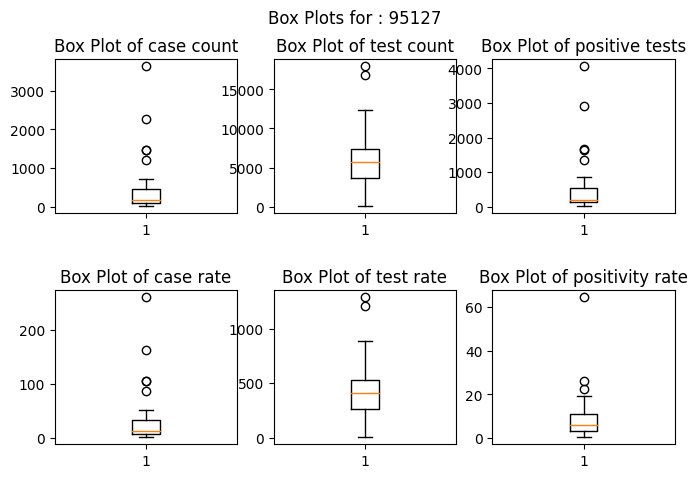

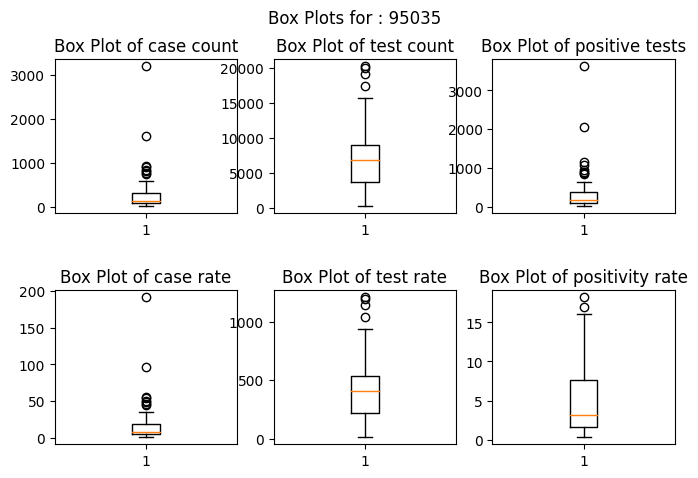

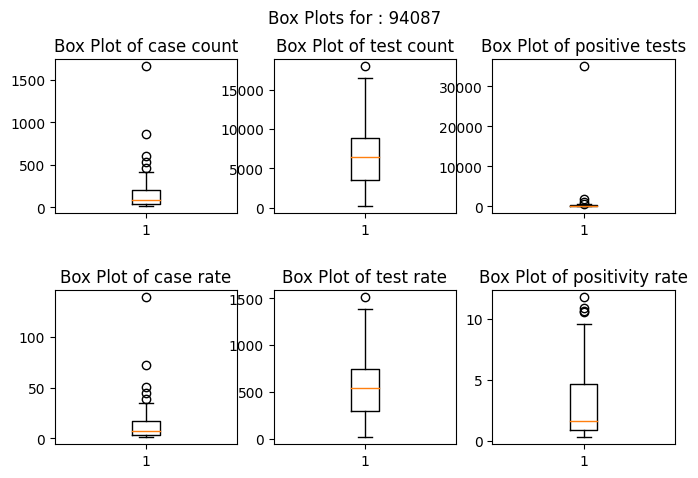

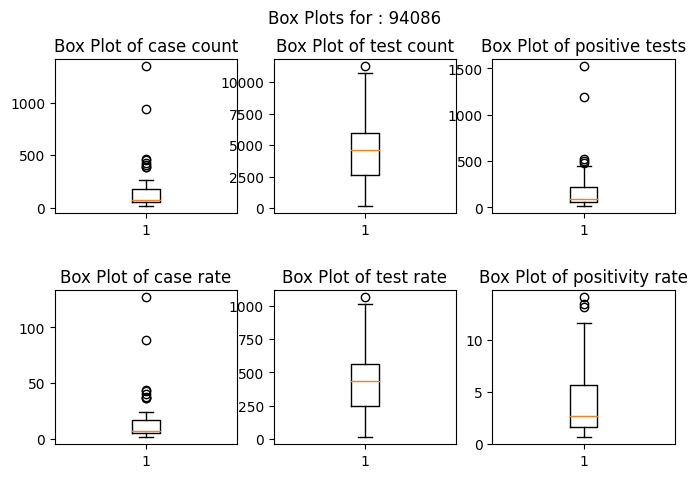

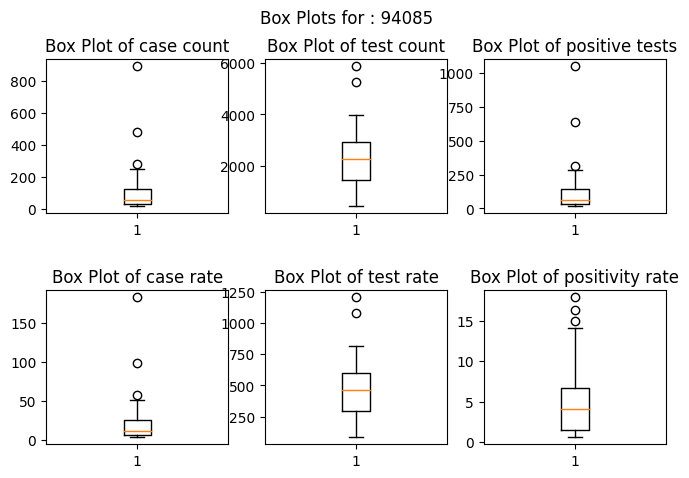

In [12]:
def box_plot_matplotlib(data, attribute, ax):
    ax.boxplot(x=data[attribute])
    ax.set_title(f'Box Plot of {attribute}')
columns = ['case count','test count','positive tests','case rate','test rate','positivity rate']
zones = new_data['zcta'].unique()
for zone in zones:
    df = new_data[new_data['zcta'] == zone]
    fig, axs = plt.subplots(2, 3, figsize=(8, 5))
    fig.subplots_adjust(hspace=0.5) 
    for i, attribute in enumerate(columns):
       row, col = divmod(i, 3)
       box_plot_matplotlib(df, attribute, axs[row, col])
    plt.suptitle(f'Box Plots for : {zone}')
    plt.show()

Visualisation apres pretraitement des outliers

c:\Users\raizer blade\Documents\studies\M2\TPs\TPDM\Projet_DM_Partie1\Project\Part1\../utils\utils.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][outliers.index] = df[column].mean()
c:\Users\raizer blade\Documents\studies\M2\TPs\TPDM\Projet_DM_Partie1\Project\Part1\../utils\utils.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][outliers.index] = df[column].mean()
c:\Users\raizer blade\Documents\studies\M2\TPs\TPDM\Projet_DM_Partie1\Project\Part1\../utils\utils.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

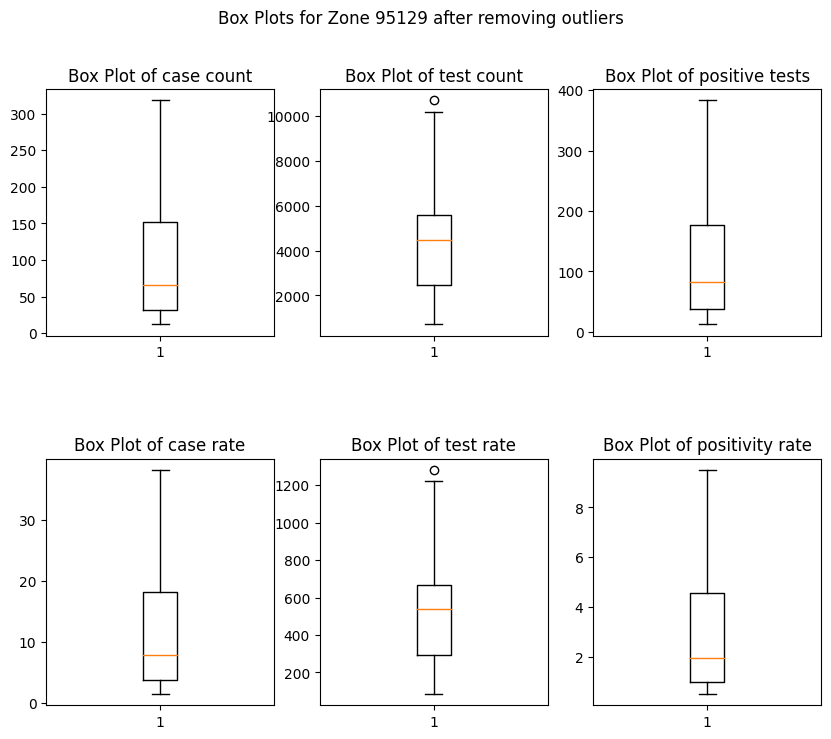

c:\Users\raizer blade\Documents\studies\M2\TPs\TPDM\Projet_DM_Partie1\Project\Part1\../utils\utils.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][outliers.index] = df[column].mean()
c:\Users\raizer blade\Documents\studies\M2\TPs\TPDM\Projet_DM_Partie1\Project\Part1\../utils\utils.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][outliers.index] = df[column].mean()
c:\Users\raizer blade\Documents\studies\M2\TPs\TPDM\Projet_DM_Partie1\Project\Part1\../utils\utils.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

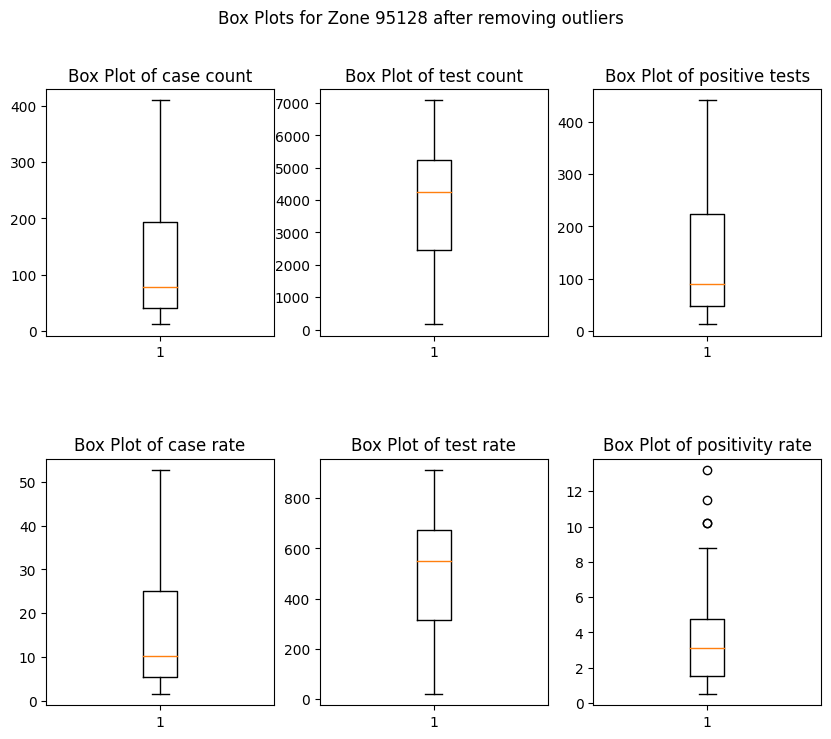

c:\Users\raizer blade\Documents\studies\M2\TPs\TPDM\Projet_DM_Partie1\Project\Part1\../utils\utils.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][outliers.index] = df[column].mean()
c:\Users\raizer blade\Documents\studies\M2\TPs\TPDM\Projet_DM_Partie1\Project\Part1\../utils\utils.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][outliers.index] = df[column].mean()
c:\Users\raizer blade\Documents\studies\M2\TPs\TPDM\Projet_DM_Partie1\Project\Part1\../utils\utils.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

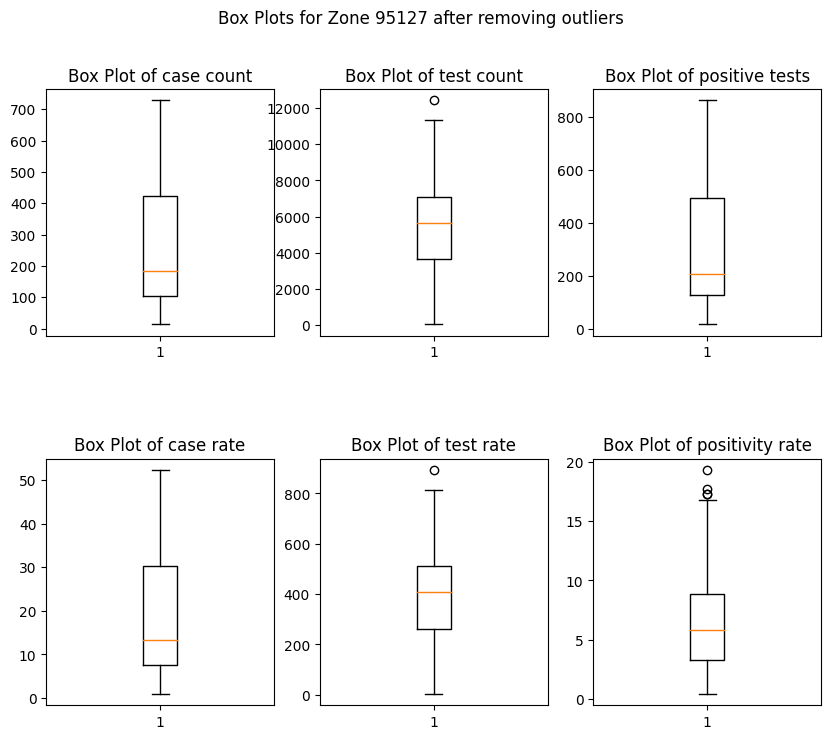

c:\Users\raizer blade\Documents\studies\M2\TPs\TPDM\Projet_DM_Partie1\Project\Part1\../utils\utils.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][outliers.index] = df[column].mean()
c:\Users\raizer blade\Documents\studies\M2\TPs\TPDM\Projet_DM_Partie1\Project\Part1\../utils\utils.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][outliers.index] = df[column].mean()
c:\Users\raizer blade\Documents\studies\M2\TPs\TPDM\Projet_DM_Partie1\Project\Part1\../utils\utils.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

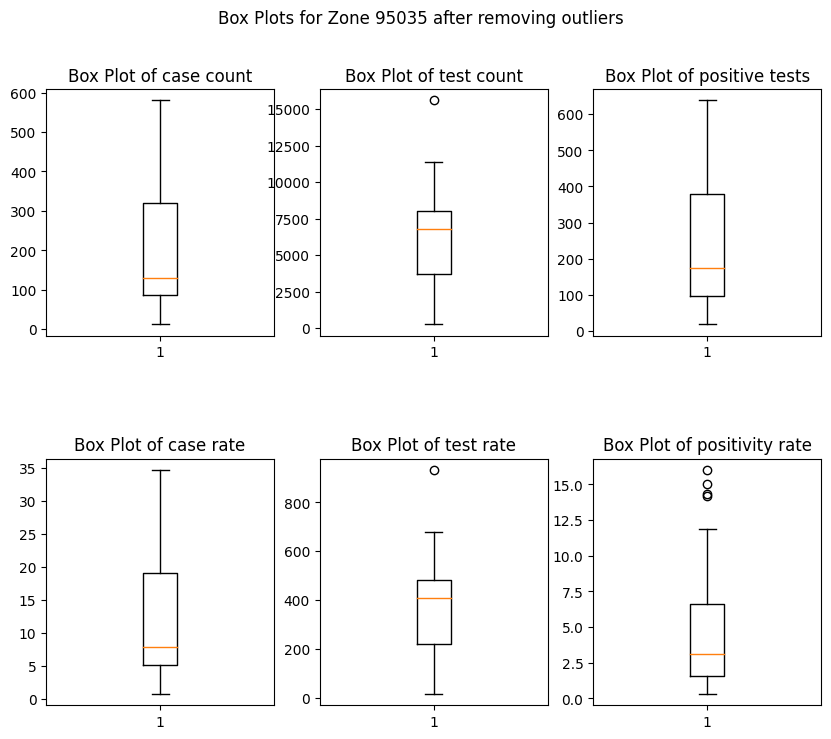

c:\Users\raizer blade\Documents\studies\M2\TPs\TPDM\Projet_DM_Partie1\Project\Part1\../utils\utils.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][outliers.index] = df[column].mean()
c:\Users\raizer blade\Documents\studies\M2\TPs\TPDM\Projet_DM_Partie1\Project\Part1\../utils\utils.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][outliers.index] = df[column].mean()
c:\Users\raizer blade\Documents\studies\M2\TPs\TPDM\Projet_DM_Partie1\Project\Part1\../utils\utils.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

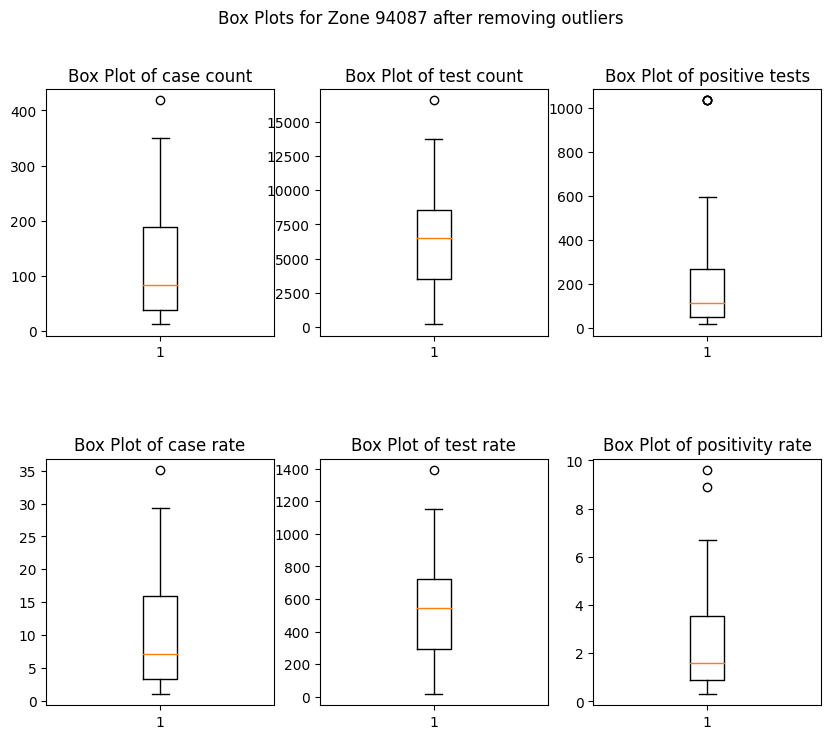

c:\Users\raizer blade\Documents\studies\M2\TPs\TPDM\Projet_DM_Partie1\Project\Part1\../utils\utils.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][outliers.index] = df[column].mean()
c:\Users\raizer blade\Documents\studies\M2\TPs\TPDM\Projet_DM_Partie1\Project\Part1\../utils\utils.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][outliers.index] = df[column].mean()
c:\Users\raizer blade\Documents\studies\M2\TPs\TPDM\Projet_DM_Partie1\Project\Part1\../utils\utils.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

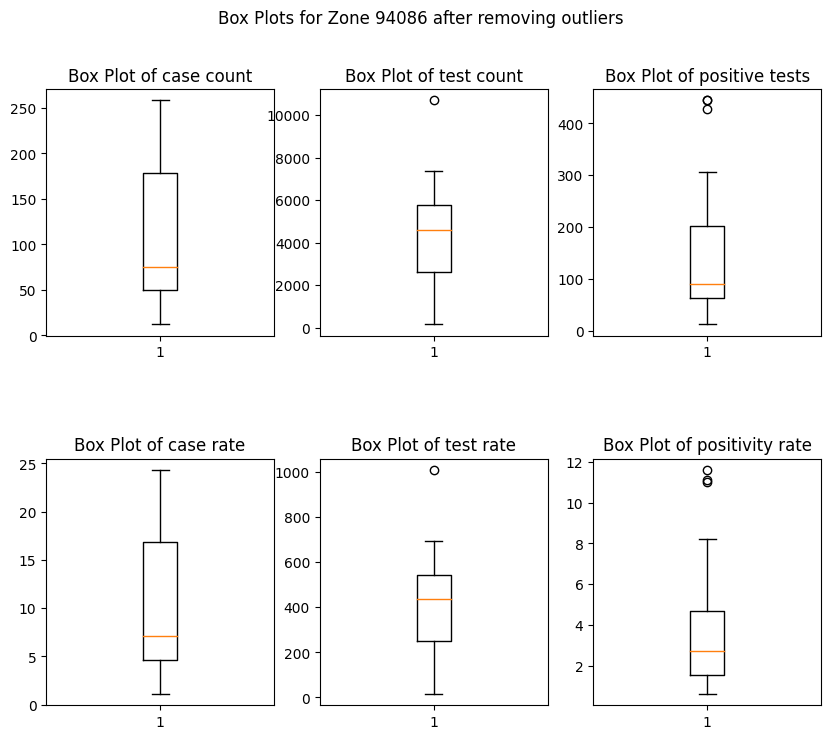

c:\Users\raizer blade\Documents\studies\M2\TPs\TPDM\Projet_DM_Partie1\Project\Part1\../utils\utils.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][outliers.index] = df[column].mean()
c:\Users\raizer blade\Documents\studies\M2\TPs\TPDM\Projet_DM_Partie1\Project\Part1\../utils\utils.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][outliers.index] = df[column].mean()
c:\Users\raizer blade\Documents\studies\M2\TPs\TPDM\Projet_DM_Partie1\Project\Part1\../utils\utils.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

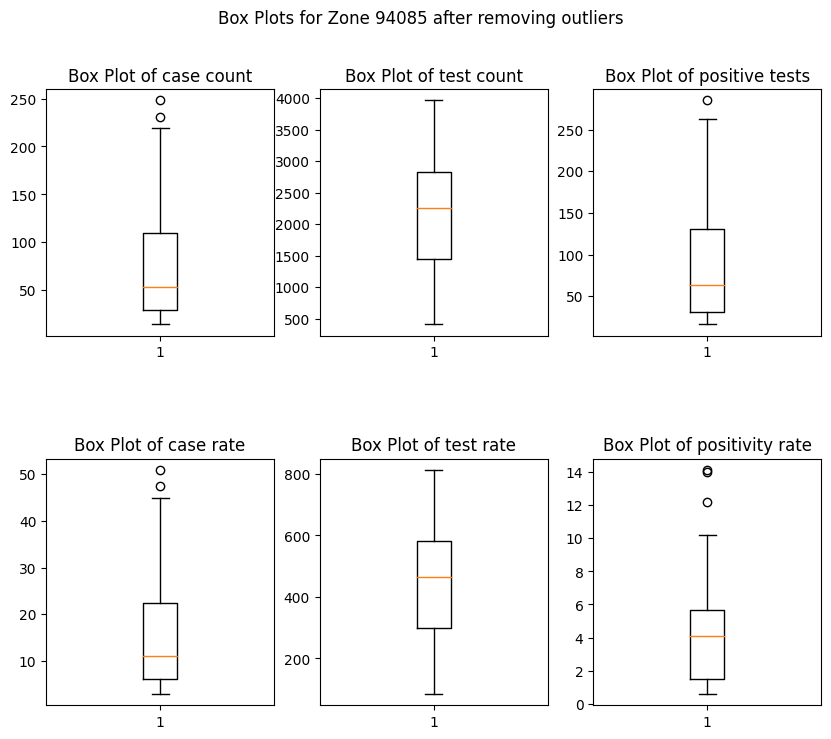

In [13]:
filtrated_dfs = []
for zone in zones:
    df = new_data[new_data['zcta'] == zone]
    for attribute in columns:
        outliers_mean(df, attribute)
    filtrated_dfs.append(df)
    fig, axs = plt.subplots(2, 3, figsize=(10, 8))
    fig.subplots_adjust(hspace=0.5) 
    for i, attribute in enumerate(columns):
       row, col = divmod(i, 3)
       box_plot_matplotlib(df, attribute, axs[row, col])
    plt.suptitle(f'Box Plots for Zone {zone} after removing outliers')
    plt.show()

In [14]:
new_data = pd.concat(filtrated_dfs, axis=0)
new_data

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,10/11/2020,10/31/2020,22.000,2543.00,23.000,2.60,304.7000,0.900
2,95129,40,39741,3/28/2021,4/17/2021,34.000,4816.00,37.000,4.10,577.1000,0.800
3,95129,55,39741,2/6/2022,2/26/2022,110.000,10194.00,175.000,13.20,1221.5000,1.700
4,95129,44,39741,6/20/2021,7/10/2021,14.000,3033.00,17.000,1.70,363.4000,0.600
5,95129,54,39741,1/16/2022,2/5/2022,152.275,4916.75,178.925,18.25,589.1375,6.100
...,...,...,...,...,...,...,...,...,...,...,...
332,94085,59,23223,1-May,21-May,165.000,2315.00,192.000,33.80,474.7000,8.300
333,94085,63,23223,24-Jul,13-Aug,150.000,1348.00,190.000,30.80,276.4000,14.100
334,94085,61,23223,12-Jun,2-Jul,219.000,1696.00,255.000,44.90,347.8000,5.275
335,94085,27,23223,28-Jun,18-Jul,53.000,1379.00,61.000,10.90,282.8000,4.400


Pretraitement des dates

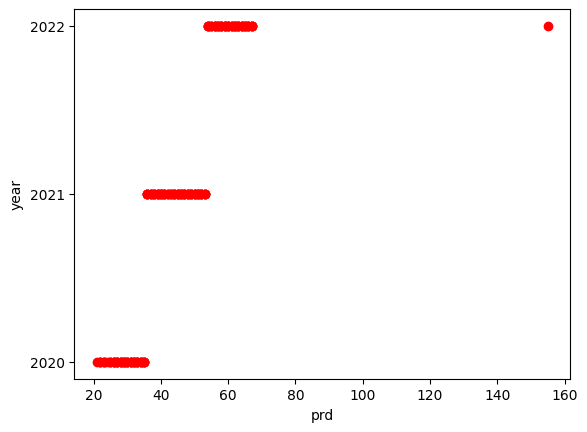

In [15]:
selected_zones = [95129, 95128, 95127, 95035]
zone_data = new_data[new_data['zcta'].isin(selected_zones)]
zone_data = zone_data.copy()
zone_data['Start date'] = pd.to_datetime(zone_data['Start date'])
zone_data['year'] = zone_data['Start date'].dt.year
plt.scatter(zone_data["time_period"],zone_data["year"],marker ='o',color='red')
y_step = 1
plt.yticks(range(min(zone_data["year"]), max(zone_data["year"])+1, y_step))
plt.xlabel('prd')
plt.ylabel('year')
plt.show()

On remarque une relation entre les annees et les periodes pour les zones ayant des dates valides

In [16]:
selected_years = [2020, 2021, 2022]
result_data = []

for selected_year in selected_years:
    selected_zones = [95129, 95128, 95127, 95035]
    zone_data = new_data[new_data['zcta'].isin(selected_zones)]
    zone_data = zone_data.copy()
    zone_data['Start date'] = pd.to_datetime(zone_data['Start date'])
    zone_data['year'] = zone_data['Start date'].dt.year
    zone_data = zone_data[zone_data['year'] == selected_year]
    min_time = zone_data['time_period'].min()
    max_time = zone_data['time_period'].max()
    result_data.append({'year': selected_year, 'min_value': min_time, 'max_value': max_time})

result_df = pd.DataFrame(result_data)
result_df

,year,min_value,max_value
0,2020,21,35
1,2021,36,53
2,2022,54,155


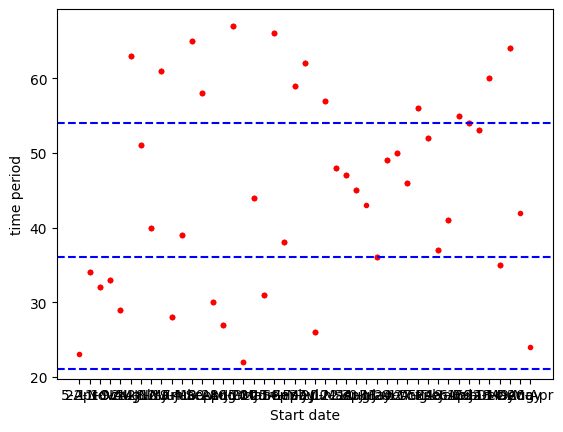

In [17]:
selected_zones = [94087, 94086, 94085]
zone_data = new_data[new_data['zcta'].isin(selected_zones)]
plt.scatter(zone_data["Start date"],zone_data["time_period"],marker ='.',color='red')
for limit in result_df['min_value']:
    plt.axhline(y=limit, color='blue', linestyle='--')
plt.xlabel('Start date')
plt.ylabel('time period')
plt.show()

In [18]:
selected_zones = [94087, 94086, 94085]
zone_data = new_data[new_data['zcta'].isin(selected_zones)]
zone_data = zone_data.copy()

new_start_years = []
new_end_years = []

for index, row in zone_data.iterrows():
    if row['time_period'] <= result_df[result_df['year'] == 2020]['max_value'].values[0]:
        new_start_years.append(row['Start date'] + '-2020')
        new_end_years.append(row['end date'] + '-2020')
    elif row['time_period'] >= result_df[result_df['year'] == 2022]['min_value'].values[0]:
        new_start_years.append(row['Start date'] + '-2022')
        new_end_years.append(row['end date'] + '-2022')
    else:
        new_start_years.append(row['Start date'] + '-2021')
        new_end_years.append(row['end date'] + '-2021')

zone_data['Start date'] = new_start_years
zone_data['end date'] = new_end_years
zone_data

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
191,94087,23,56668,5-Apr-2020,25-Apr-2020,39.0,395.0,42.000000,3.3,33.2,3.313953
192,94087,34,56668,22-Nov-2020,12-Dec-2020,189.0,6976.0,209.000000,15.9,586.2,3.000000
193,94087,32,56668,11-Oct-2020,31-Oct-2020,19.0,4371.0,1034.372093,1.6,367.3,0.500000
194,94087,33,56668,1-Nov-2020,21-Nov-2020,47.0,5877.0,66.000000,3.9,493.9,1.100000
195,94087,29,56668,9-Aug-2020,29-Aug-2020,25.0,3276.0,31.000000,2.1,275.3,0.900000
...,...,...,...,...,...,...,...,...,...,...,...
332,94085,59,23223,1-May-2022,21-May-2022,165.0,2315.0,192.000000,33.8,474.7,8.300000
333,94085,63,23223,24-Jul-2022,13-Aug-2022,150.0,1348.0,190.000000,30.8,276.4,14.100000
334,94085,61,23223,12-Jun-2022,2-Jul-2022,219.0,1696.0,255.000000,44.9,347.8,5.275000
335,94085,27,23223,28-Jun-2020,18-Jul-2020,53.0,1379.0,61.000000,10.9,282.8,4.400000


Normaliser les formats de dates

In [19]:
zone_data['Start date'] = pd.to_datetime(zone_data['Start date'], format='%d-%b-%Y')
zone_data['Start date'] = zone_data['Start date'].dt.strftime('%m/%d/%Y')
zone_data['end date'] = pd.to_datetime(zone_data['end date'], format='%d-%b-%Y')
zone_data['end date'] = zone_data['end date'].dt.strftime('%m/%d/%Y')
zone_data

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
191,94087,23,56668,04/05/2020,04/25/2020,39.0,395.0,42.000000,3.3,33.2,3.313953
192,94087,34,56668,11/22/2020,12/12/2020,189.0,6976.0,209.000000,15.9,586.2,3.000000
193,94087,32,56668,10/11/2020,10/31/2020,19.0,4371.0,1034.372093,1.6,367.3,0.500000
194,94087,33,56668,11/01/2020,11/21/2020,47.0,5877.0,66.000000,3.9,493.9,1.100000
195,94087,29,56668,08/09/2020,08/29/2020,25.0,3276.0,31.000000,2.1,275.3,0.900000
...,...,...,...,...,...,...,...,...,...,...,...
332,94085,59,23223,05/01/2022,05/21/2022,165.0,2315.0,192.000000,33.8,474.7,8.300000
333,94085,63,23223,07/24/2022,08/13/2022,150.0,1348.0,190.000000,30.8,276.4,14.100000
334,94085,61,23223,06/12/2022,07/02/2022,219.0,1696.0,255.000000,44.9,347.8,5.275000
335,94085,27,23223,06/28/2020,07/18/2020,53.0,1379.0,61.000000,10.9,282.8,4.400000


corriger les dates de fin : s'assure que la date de fin est postérieure à la date de début

In [20]:
zone_data['Start date'] = pd.to_datetime(zone_data['Start date'])
zone_data['end date'] = pd.to_datetime(zone_data['end date'])
mask = zone_data['end date'].dt.month < zone_data['Start date'].dt.month
zone_data.loc[mask, 'end date'] = zone_data.loc[mask, 'end date'] + pd.DateOffset(years=1)
zone_data

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
191,94087,23,56668,2020-04-05,2020-04-25,39.0,395.0,42.000000,3.3,33.2,3.313953
192,94087,34,56668,2020-11-22,2020-12-12,189.0,6976.0,209.000000,15.9,586.2,3.000000
193,94087,32,56668,2020-10-11,2020-10-31,19.0,4371.0,1034.372093,1.6,367.3,0.500000
194,94087,33,56668,2020-11-01,2020-11-21,47.0,5877.0,66.000000,3.9,493.9,1.100000
195,94087,29,56668,2020-08-09,2020-08-29,25.0,3276.0,31.000000,2.1,275.3,0.900000
...,...,...,...,...,...,...,...,...,...,...,...
332,94085,59,23223,2022-05-01,2022-05-21,165.0,2315.0,192.000000,33.8,474.7,8.300000
333,94085,63,23223,2022-07-24,2022-08-13,150.0,1348.0,190.000000,30.8,276.4,14.100000
334,94085,61,23223,2022-06-12,2022-07-02,219.0,1696.0,255.000000,44.9,347.8,5.275000
335,94085,27,23223,2020-06-28,2020-07-18,53.0,1379.0,61.000000,10.9,282.8,4.400000


Recupere les valeurs pour les zones qui avaient des dates valides et normaliser leur formats

In [21]:
selected_zones = [95129, 95128, 95127, 95035]
first_zones_data = new_data[new_data['zcta'].isin(selected_zones)]
first_zones_data = first_zones_data.copy()
first_zones_data['Start date'] = pd.to_datetime(first_zones_data['Start date'])
first_zones_data['end date'] = pd.to_datetime(first_zones_data['end date'])
first_zones_data

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,2020-10-11,2020-10-31,22.000000,2543.00,23.000000,2.600000,304.7000,0.9
2,95129,40,39741,2021-03-28,2021-04-17,34.000000,4816.00,37.000000,4.100000,577.1000,0.8
3,95129,55,39741,2022-02-06,2022-02-26,110.000000,10194.00,175.000000,13.200000,1221.5000,1.7
4,95129,44,39741,2021-06-20,2021-07-10,14.000000,3033.00,17.000000,1.700000,363.4000,0.6
5,95129,54,39741,2022-01-16,2022-02-05,152.275000,4916.75,178.925000,18.250000,589.1375,6.1
...,...,...,...,...,...,...,...,...,...,...,...
186,95035,62,79655,2022-07-03,2022-07-23,340.777778,5428.00,401.511111,20.366667,324.5000,16.0
187,95035,65,79655,2022-09-04,2022-09-24,171.000000,3414.00,199.000000,10.200000,204.1000,5.8
188,95035,38,79655,2021-02-14,2021-03-06,97.000000,7315.00,121.000000,5.800000,437.3000,1.7
189,95035,66,79655,2022-09-25,2022-10-15,146.000000,3001.00,180.000000,8.700000,179.4000,6.0


Concatener les deux dataframe pour reconstruire notre dataset et le sauvgarder en format csv

In [22]:
data_final = pd.concat([first_zones_data, zone_data], axis=0)
data_final.to_csv("../Data/Dataset2_final.csv", index=False)